# 8. Machine Learning with Python (Regression & Classification)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import wget
import sklearn as sk
%matplotlib inline

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = wget.download(url)
df = pd.read_csv(df)
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [3]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


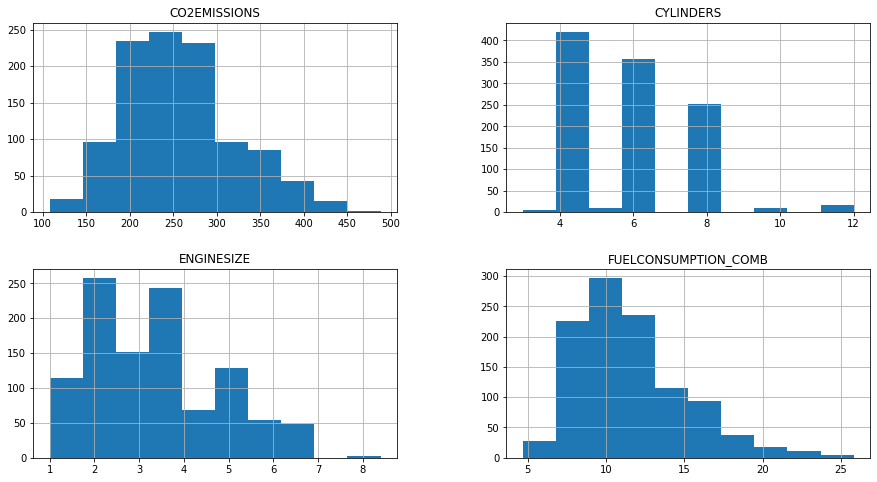

In [4]:
df.hist(
    figsize = (15,8)
)
plt.show()

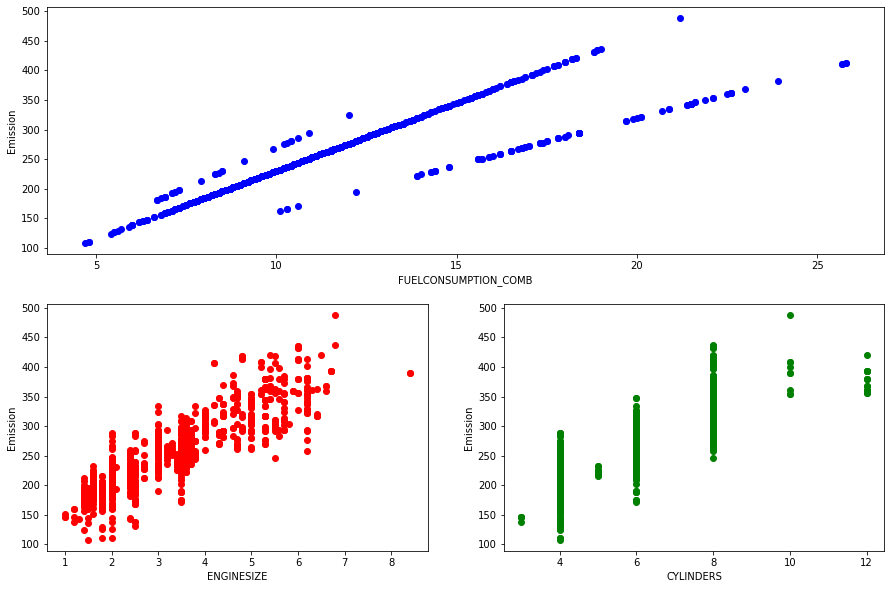

In [5]:
fig = plt.figure(
    figsize = (15,10)
)

ax1 = fig.add_subplot(2, 1,1)
ax1.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
ax1.set_xlabel("FUELCONSUMPTION_COMB")
ax1.set_ylabel("Emission")

ax2 = fig.add_subplot(2,2,4)
ax2.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='green')
ax2.set_xlabel("CYLINDERS")
ax2.set_ylabel("Emission")

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
ax3.set_xlabel("ENGINESIZE")
ax3.set_ylabel("Emission")

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']], 
    df[['CO2EMISSIONS']],
    test_size = 0.2,
    random_state = 0
)

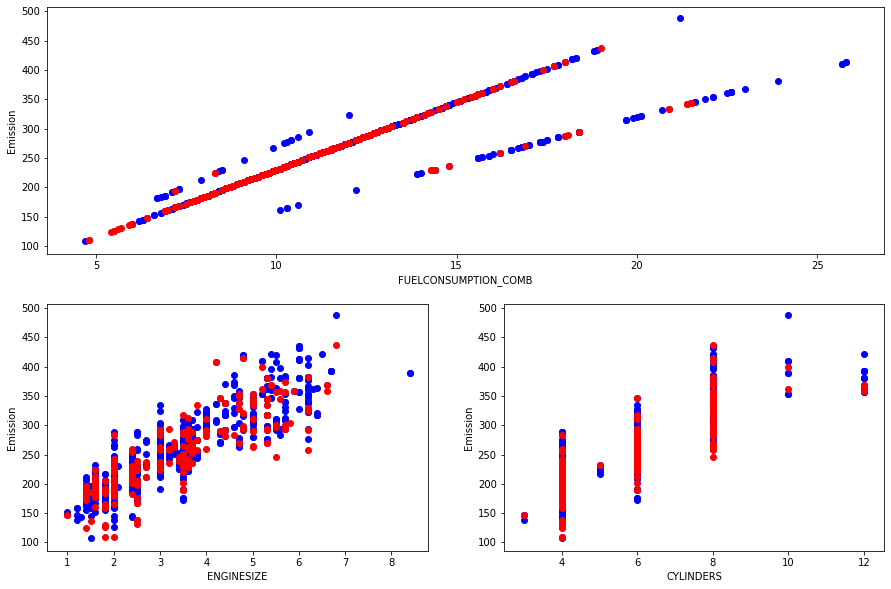

In [7]:
fig = plt.figure(
    figsize = (15,10)
)

ax1 = fig.add_subplot(2, 1,1)
ax1.scatter(x_train.FUELCONSUMPTION_COMB, y_train.CO2EMISSIONS,  color='blue')
ax1.scatter(x_test.FUELCONSUMPTION_COMB, y_test.CO2EMISSIONS,  color='red')
ax1.set_xlabel("FUELCONSUMPTION_COMB")
ax1.set_ylabel("Emission")

ax2 = fig.add_subplot(2,2,4)
ax2.scatter(x_train.CYLINDERS, y_train.CO2EMISSIONS,  color='blue')
ax2.scatter(x_test.CYLINDERS, y_test.CO2EMISSIONS,  color='red')
ax2.set_xlabel("CYLINDERS")
ax2.set_ylabel("Emission")

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
ax3.scatter(x_test.ENGINESIZE, y_test.CO2EMISSIONS,  color='red')
ax3.set_xlabel("ENGINESIZE")
ax3.set_ylabel("Emission")

plt.show()

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Linear Regression](#0)<br>
2. [Multiple Regression](#2)<br>
3. [Polynomial Regression](#4)<br>
4. [Non Linear Regression](#6)<br>
6. [K-Nearest Neighbors](#8)<br>
7. [Decision Trees](#10)<br>
8. [Logistic Regression](#12)<br>
2. [SVM ](#14)<br>

</div>
<hr>

# Linear Regression<a id="0"></a>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X_train = np.asanyarray(x_train[['ENGINESIZE']])
Y_train = np.asanyarray(y_train)

regr.fit (X_train, Y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


Text(0, 0.5, 'Emission')

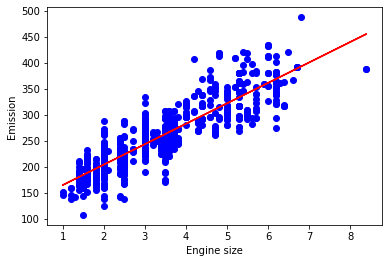

In [9]:
plt.scatter(x_train.ENGINESIZE, y_train,  color='blue')
plt.plot(x_train.ENGINESIZE, regr.coef_[0][0]*x_train.ENGINESIZE + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [10]:
from sklearn.metrics import r2_score

X_test = np.asanyarray(x_test[['ENGINESIZE']])
Y_test = np.asanyarray(y_test)
test_y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , Y_test) )

Mean absolute error: 25.57
Residual sum of squares (MSE): 1181.53
R2-score: 0.63


# Multiple Regression<a id="0"></a>
In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [11]:
regr = linear_model.LinearRegression()
X_train = np.asanyarray(x_train)
Y_train = np.asanyarray(y_train)
regr.fit (X_train, Y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.98993058  8.98695981  7.54469599]]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [12]:
y_hat = regr.predict(x_test)
X_test= np.asanyarray(x_test)
Y_test = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      %np.mean((y_hat - Y_test)**2))
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Residual sum of squares: 589.24
Variance score: 0.86


# Plynomial Regression<a id="4"></a>
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [13]:
from sklearn.preprocessing import PolynomialFeatures

X_train = np.asanyarray(x_train[['ENGINESIZE']])
Y_train = np.asanyarray(y_train)

X_test = np.asanyarray(x_test[['ENGINESIZE']])
Y_test = np.asanyarray(y_test)


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[ 1.  ,  3.6 , 12.96],
       [ 1.  ,  4.6 , 21.16],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.7 , 13.69]])

In [14]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, Y_train)
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         49.44724505 -1.34988027]]
Intercept:  [109.857053]


Text(0, 0.5, 'Emission')

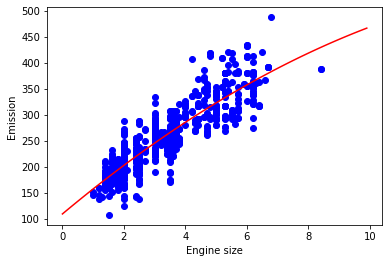

In [15]:
plt.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [16]:
test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - Y_test)))
print("Residual sum of square (MSE): %.2f" %np.mean((test_y_ - Y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_, Y_test))

Mean absolute error: 25.51
Residual sum of square (MSE): 1166.34
R2-score: 0.64


# Non Linear Regression<a id="6"></a>
 If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear. 
}Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y = $2x$ + 3.

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

C:\Users\JRodr\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log


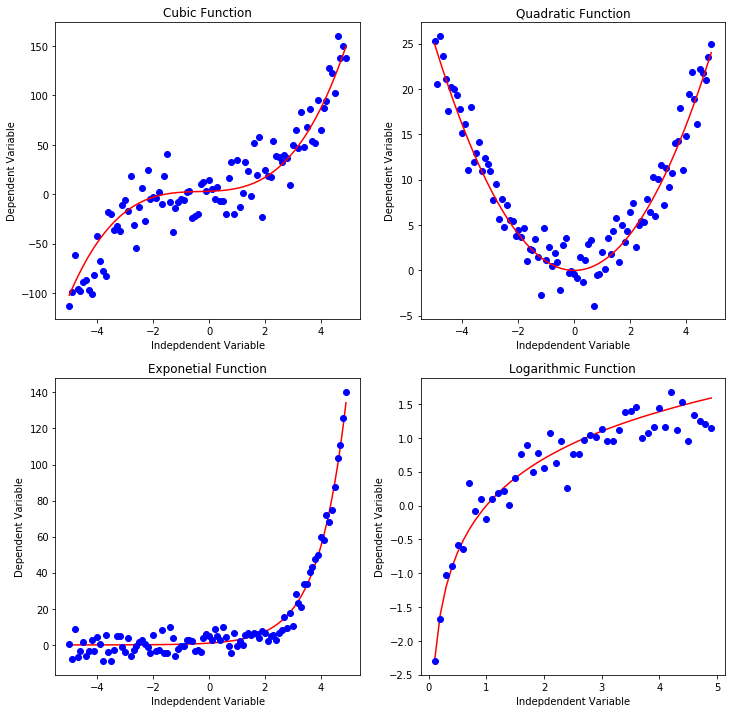

In [17]:
Fig = plt.figure( figsize = (12,12))

x = np.arange(-5.0, 5.0, 0.1)

ax1 = Fig.add_subplot(2,2,1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
ax1.plot(x, ydata,  'bo')
ax1.plot(x,y, 'r') 
ax1.set_ylabel('Dependent Variable')
ax1.set_xlabel('Indepdendent Variable')
ax1.set_title("Cubic Function")

ax2 = Fig.add_subplot(2,2,2)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
ax2.plot(x, ydata,  'bo')
ax2.plot(x,y, 'r') 
ax2.set_ylabel('Dependent Variable')
ax2.set_xlabel('Indepdendent Variable')
ax2.set_title("Quadratic Function")

ax3 = Fig.add_subplot(2,2,3)
y= np.exp(x)
y_noise = 4 * np.random.normal(size = x.size)
ydata = y + y_noise
ax3.plot(x,y, 'r')
ax3.plot(x, ydata, 'bo')
ax3.set_ylabel('Dependent Variable')
ax3.set_xlabel('Indepdendent Variable')
ax3.set_title("Exponetial Function")

ax4 = Fig.add_subplot(2,2,4)
y = np.log(x)
y_noise = .25 * np.random.normal(size = x.size)
ydata = y + y_noise
ax4.plot(x,y, 'r')
ax4.plot(x, ydata, 'bo')
ax4.set_ylabel('Dependent Variable')
ax4.set_xlabel('Indepdendent Variable')
ax4.set_title("Logarithmic Function")


plt.show()

Text(0.5, 1.0, 'Sigmoidal/Logistic Function')

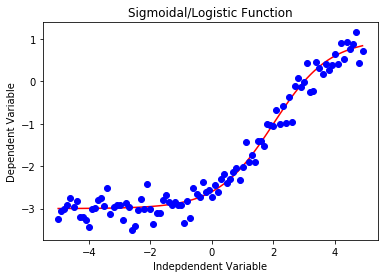

In [18]:
y = 1-4/(1+np.power(3, x-2))
y_noise = .25 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x,y, 'r')
plt.plot(x, ydata, 'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title("Sigmoidal/Logistic Function")

In [19]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv"
df = pd.read_csv(url)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [20]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

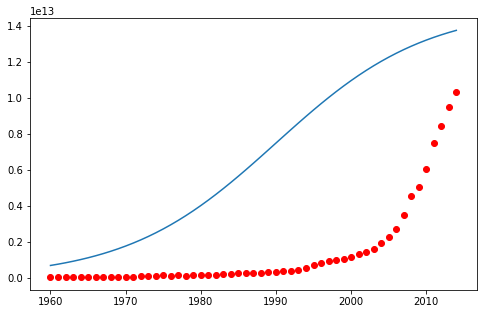

In [21]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

 beta_1 = 690.451711, beta_2 = 0.997207


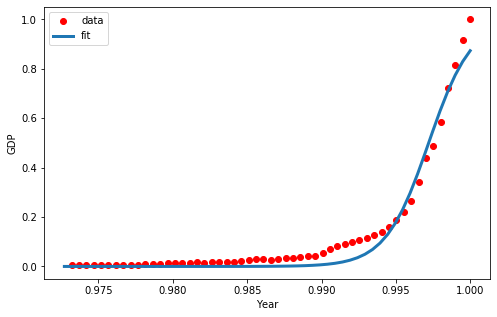

R2 Score : 0.97


In [22]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

print("R2 Score : %.2f" % r2_score(y, ydata))

# K-Nearest Neighbors<a id="6"></a>
**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In [23]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [24]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv"
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [25]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8101919C8>]],
      dtype=object)

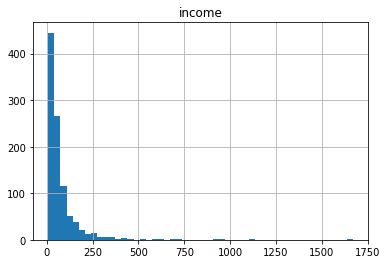

In [26]:
df.hist(column = 'income', bins = 50)

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [28]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [29]:
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [30]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 3, 3, 4, 4], dtype=int64)

In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Tests set Accuracy: ", metrics.accuracy_score(Y_test, neigh.predict(X_test)))

Train set Accuracy:  0.5375
Tests set Accuracy:  0.315


In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
    std_acc = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
mean_acc


array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

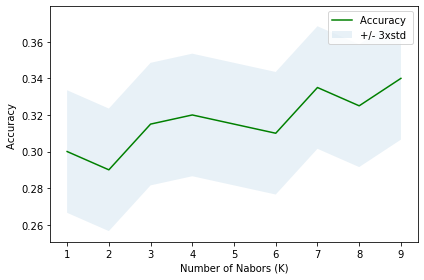

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Decision Trees<a id="6"></a>
**Entropy** is the amount of information disorder or the amount of randomness in the data. The entropy in the node depends on how much random data is in that node and is calculated for each node. In decision trees, we're looking for trees that have the smallest entropy in their nodes. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one. This means if all the data in a node are either drug A or drug B, then the entropy is zero, but if half of the data are drug A and other half are B then the entropy is one. You can easily calculate the entropy of a node using the frequency table of the attribute through the entropy formula where P is for the proportion or ratio of a category,
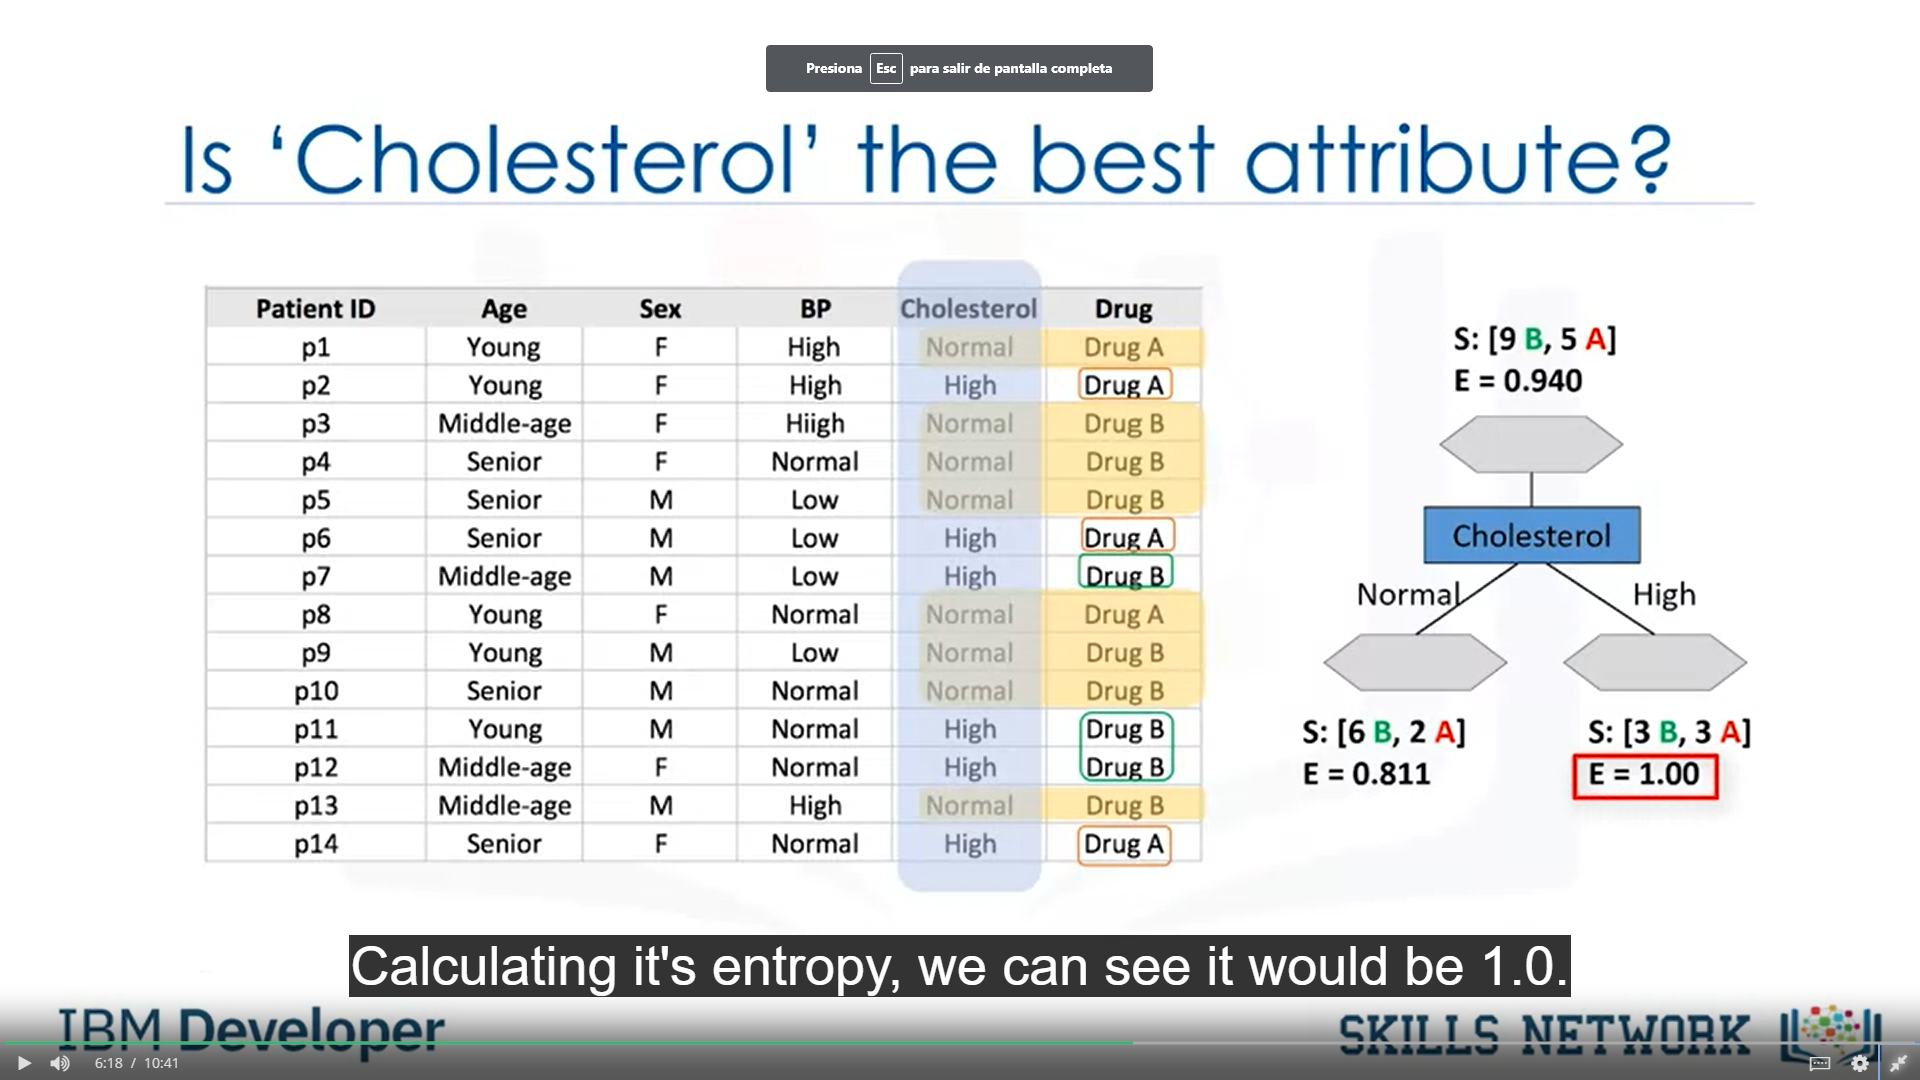
We can calculate the entropy of this node based on the distribution of drug A and B which is 0.8 in this case. But, when cholesterol is high, the data is split into three for drug B and three for drug A. Calculating it's entropy, we can see it would be 1.0.
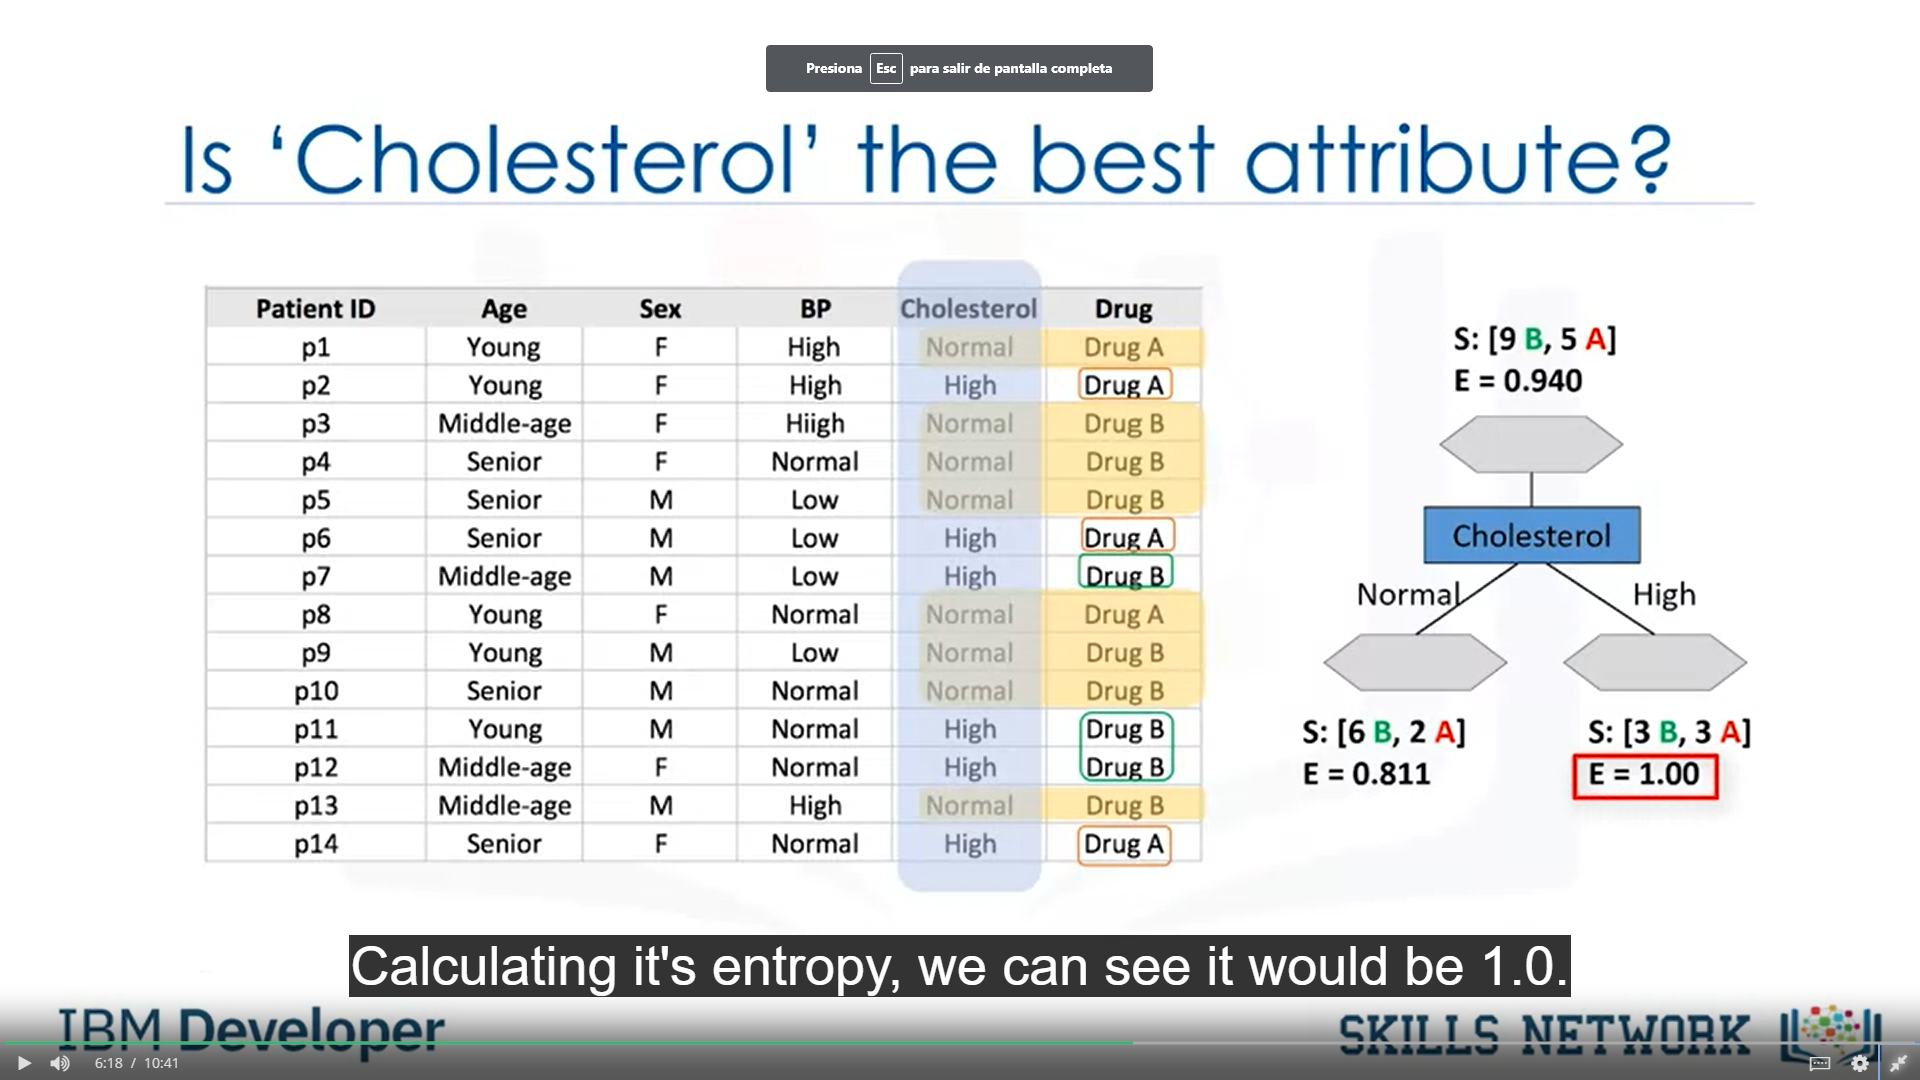

In [39]:
#Read the data
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
Trees_df = pd.read_csv(url)
print(Trees_df.shape)
Trees_df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [40]:
from sklearn import preprocessing

X = Trees_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

y = Trees_df["Drug"]

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [41]:
print("X: " + str(X.shape))
print("y: " + str(y.shape))

X: (200, 5)
y: (200,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
drugTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object
DecisionTrees's Accuracy:  0.9833333333333333


In [45]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = Trees_df.columns[0:5]
targetNames = Trees_df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(Trees_df.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined

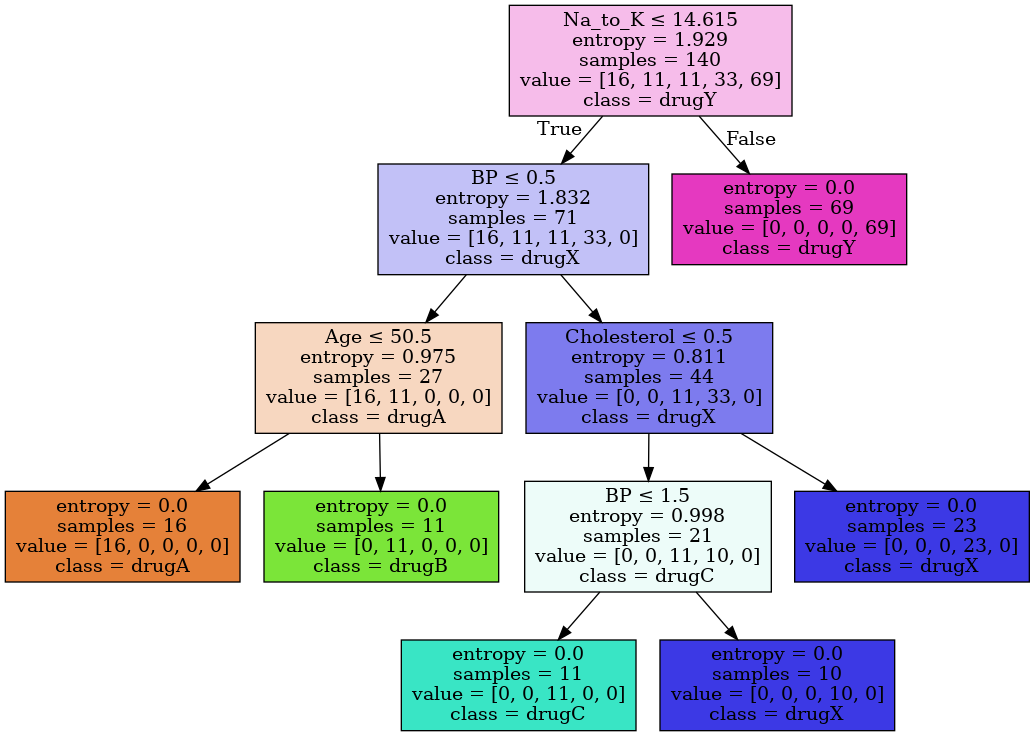

# Logistic Regression<a id="6"></a>


## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

In [46]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv"
log_df = pd.read_csv(url)
log_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [48]:
log_df = log_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
log_df['churn'] = log_df['churn'].astype('int')
log_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [49]:
X = np.asarray(log_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(log_df['churn'])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [50]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score

In [52]:
LR = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob
jaccard_similarity_score(y_test, yhat)

C:\Users\JRodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



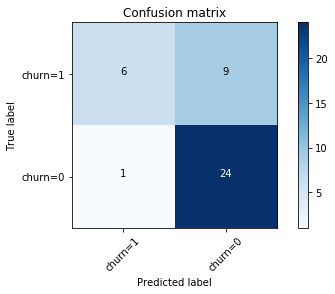

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))


Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187

# SVM (Support Vector Machines)<a id="6"></a>
SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [97]:
import scipy.optimize as opt

In [99]:
svm_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv")
svm_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


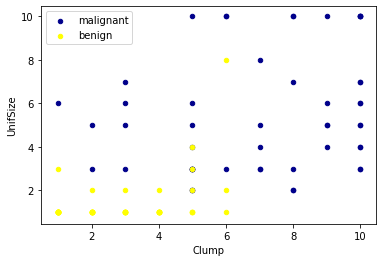

In [114]:
x = 'Clump'
y = 'UnifSize'
ax = svm_df[svm_df['Class'] == 4][0:50].plot(
    kind = 'scatter',
    x = x, 
    y = y, 
    color = 'Darkblue',
    label = 'malignant', 
)
svm_df[svm_df['Class'] == 2][0:50].plot(
    kind = 'scatter',
    x = x, 
    y = y, 
    color = 'Yellow',
    label = 'benign',
    ax = ax
)
plt.show()

In [106]:
svm_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [108]:
svm_df = svm_df[pd.to_numeric(svm_df['BareNuc'], errors = 'coerce').notnull()]
svm_df['BareNuc'] = svm_df['BareNuc'].astype('int')
svm_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [118]:
feature_df = svm_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
print(X[0:2])

svm_df['Class'] = svm_df['Class'].astype('int')
y = np.asarray(svm_df['Class'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]]
Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [119]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
yhat = clf.predict(X_test)
print(y_test[0:5])
print(yhat [0:5])

[2 4 2 4 2]
[2 4 2 4 2]


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


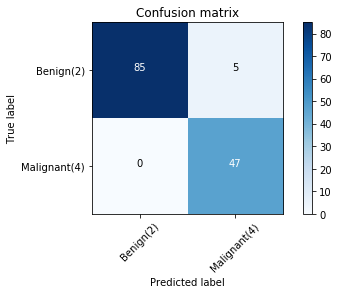

In [125]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [130]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

In [131]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\JRodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365